In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Plots in Paper</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
MODEL = "BAH"                   # main network model
x = 5                           # number of networks same type
EPOCHS = 10                     # number of times relational classification is done in 1 network
SMALLP = 0.3                    # pseeds <= small p (SMALL SAMPLES)
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, 'mixed_effects')
OUTPUT_PLOTS = os.path.join(OUTPUT, 'plots')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp10,EEcp11,EEcp01,SEp0,SEp1,SEcp00,SEcp11,SEcpDiff,SEcpSum,SE
0,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.70,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.05,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,2000,20,0.01981,0.3,0.9,3.0,5.0,nodes,0.30,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<h3>Plotting setup</h3>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    

<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [6]:
sampling = 'nodes'
df_rq1 = df_results.query("kind==@MODEL & sampling==@sampling")
df_rq1.shape

(66000, 48)

<h3>Network structure vs. Global performance</h3>

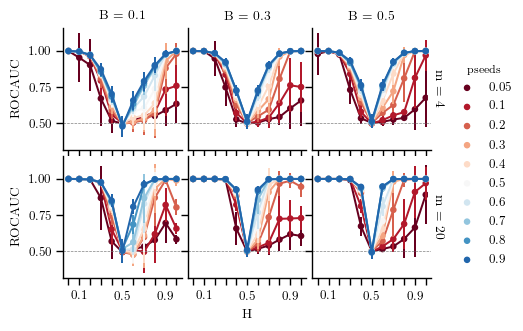

In [7]:
N = 2000

fn = os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_H_{}_N{}_x{}_RUNS{}.pdf'.format(sampling, N, x, EPOCHS))
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==@N"), columns, fn=fn)

<h3>Estimation error (Conditional Probability): Majority vs minority</h3>

../results-batch/plots/R1_SE_condprob_N2000_m4_leqP30_nodes.pdf saved!


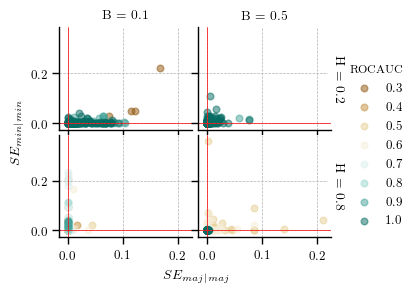

In [8]:
N = 2000
m = 4
H = [0.2, 0.8]
B = [0.1, 0.5]

fn = os.path.join(OUTPUT_PLOTS, 'R1_SE_condprob_N{}_m{}_leqP{}_{}.pdf'.format(N, m, int(100*SMALLP), sampling))
viz.plot_estimation_errors_per_H_B_rocauc(df_rq1.query("N==@N & m==@m & pseeds<=@SMALLP & H in @H & B in @B"), 
                                          columns, metricx='SEcp00', metricy='SEcp11', fn=fn)

<h3>Real World vs. Mixed-effects model</h3>

In [9]:
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"params.pickle"))

df_realworld = df_results.query("kind!=@MODEL & sampling==@sampling").copy()
df_realworld = prediction.setup(df_realworld)
df_realworld = df_realworld.append(prediction.predict_allrows(df_realworld, mdf, params), ignore_index=True)
df_realworld.sample(5)

../results-batch/mixed_effects/mdf.pickle loaded!
../results-batch/mixed_effects/params.pickle loaded!


,source,dataset,N,m,density,B,H,sampling,pseeds,ROCAUC,epoch
545,model,Caltech36,701,1,0.063028,0.33,0.56,nodes,0.40,0.598989,6
657,model,Escorts,16730,1,0.000279,0.40,0.00,nodes,0.50,1.333092,8
769,model,Swarthmore42,1519,1,0.046600,0.49,0.53,nodes,0.60,0.664131,10
802,model,USF51,1705,1,0.010737,0.40,0.45,nodes,0.05,0.574076,3
979,model,Wikipedia,2132,1,0.001384,0.15,0.60,nodes,0.70,0.754700,10


../results-batch/plots/R1_ROCAUC_pseeds_nodes_empirical_mixedmodel_RUNS10.pdf saved!


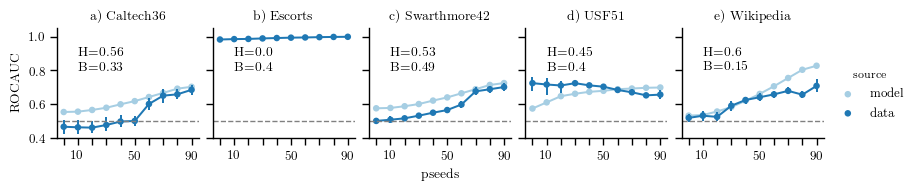

In [10]:
fn = os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_pseeds_{}_empirical_mixedmodel_RUNS{}.pdf'.format(sampling, EPOCHS))
viz.plot_model_vs_data(df_realworld, fn)

<h3>Model fit: Real World vs. Synthetic model</h3>

In [11]:
# df_realworld = df_results.query("kind!=@MODEL & sampling==@sampling").copy()
# df_realworld = prediction.setup(df_realworld)
# df_realworld.loc[:,'source'] = df_realworld.apply(lambda row: 'model' if row.fit else 'data', axis=1)
# df_realworld.loc[:,'dataset'] = df_realworld.apply(lambda row: row.kind.split('-')[-1] if row.fit else row.kind , axis=1)
# df_realworld.sample(5)

../results-batch/plots/R1_ROCAUC_pseeds_nodes_empirical_model_RUNS10.pdf saved!


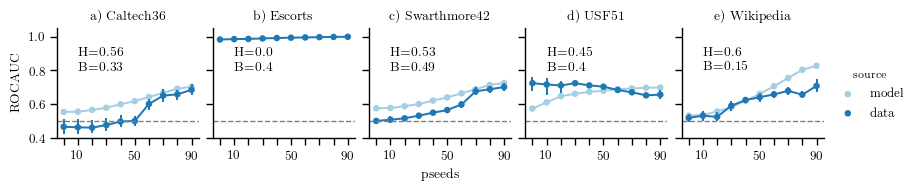

In [12]:
fn = os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_pseeds_{}_empirical_model_RUNS{}.pdf'.format(sampling, EPOCHS))
viz.plot_model_vs_data(df_realworld, fn)

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [13]:
N = 2000
m = 4
H = [0.2, 0.8]
B = [0.1, 0.5]

df_rq2 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H & B in @B & pseeds<=@SMALLP & sampling!='neighbors'")
df_rq2.shape


(3190, 48)

<h3>Comparison of estimation errors (small samples)</h3>

### Available metrics:
--------------------------------------------------------------------------

#### Estimation error: estimated - observed
 - 'EEp1','EEp0',       prior error
 - 'EEcp00','EEcp10',   conditional prob. x given majority error
 - 'EEcp11','EEcp01',   conditional prob. x given minority error
 
#### Squared Error: (estimated - observed)^2
 - 'SEp1',
 - 'SEcp00', 
 - 'SEcp11',

#### Overall Errors
 - 'SEcpDiff',  Diff of the 2 cp SE
 - 'SEcpSum',   Sum of all 2 cp SE
 - 'SE',        sum of all 3 SE


nodes
../results-batch/plots/R2_SE_estimates_leqP30_nodes.pdf saved!


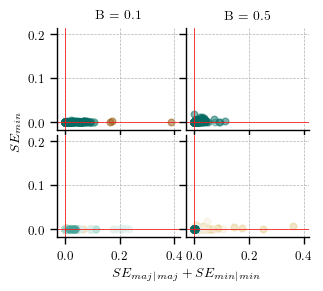

nedges
../results-batch/plots/R2_SE_estimates_leqP30_nedges.pdf saved!


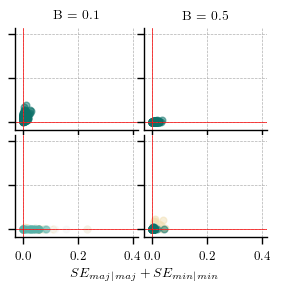

degree
../results-batch/plots/R2_SE_estimates_leqP30_degree.pdf saved!


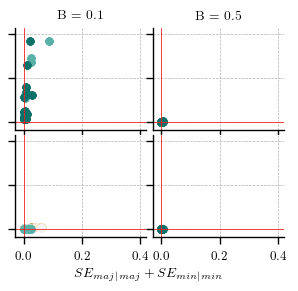

partial\_crawls
../results-batch/plots/R2_SE_estimates_leqP30_partial\_crawls.pdf saved!


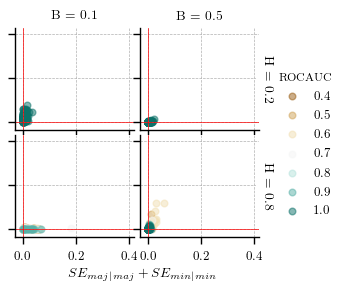

In [14]:
sampling = 'all'
fn = os.path.join(OUTPUT_PLOTS, 'R2_SE_estimates_leqP{}_<sampling>.pdf'.format(int(100*SMALLP)))
viz.plot_estimation_errors_per_H_B_rocauc_sampling(df_rq2, columns, 'SEcpSum', 'SEp1', sampling, fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [15]:
H = [0.2, 0.5, 0.8]

df_rq3 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H & pseeds <= @SMALLP & sampling != 'neighbors'")
df_rq3.head()

,kind,N,m,density,B,H,i,x,sampling,pseeds,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
302,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
303,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
304,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.30,...,0.006680,-0.006680,-0.043030,0.001336,0.001336,0.001852,0.000045,0.001807,0.001896,0.003232
305,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.20,...,0.027041,-0.027041,-0.037175,0.001046,0.001046,0.001382,0.000731,0.000651,0.002113,0.003159
307,BAH,2000,4,0.003994,0.5,0.5,1.0,5.0,degree,0.05,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604


<h3>Performance Bias</h3>

../results-batch/plots/R3_BIAS_bars_leqP30.pdf saved!


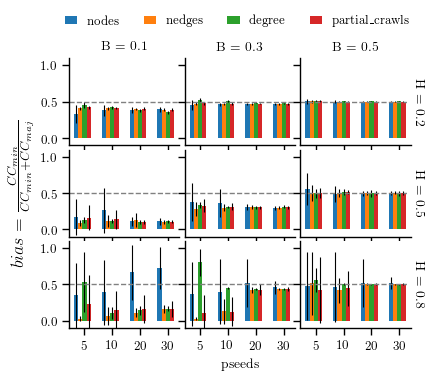

In [16]:
fn = os.path.join(OUTPUT_PLOTS, 'R3_BIAS_bars_leqP{}.pdf'.format(int(100*SMALLP)))
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)